# **FOOD PRICE IN INDIA**


In [2]:
# importing necessory librarys



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **About this dataset**


The dataset captures food price information across various markets in India, providing detailed records for each entry. It includes date, indicating when the data was collected, and location details such as administrative divisions (admin1 and admin2) and market name, pinpointed with latitude and longitude coordinates. Each record categorizes food items by category (e.g., cereals, oils) and commodity (specific food items like wheat or rice), with associated unit of measure (e.g., kilogram). Price details include the priceflag (showing if prices are actual or estimated), pricetype (e.g., Retail), currency, and prices listed in both local currency and USD. The data structure suggests some columns may need cleaning due to mixed data types, and the first row appears to function as metadata instead of data values.

**Problem statement**
- This project aims to analyze and predict food price trends across different markets in India. By examining factors like location, time, and food categories, we seek to uncover patterns in price fluctuations. Insights from this analysis will help inform policy decisions on food security, improve distribution strategies, and assist stakeholders in managing price volatility effectively.

**Features**

- date: Date of the record.
- admin1 and admin2: Administrative divisions (e.g., states or regions).
- market: The market name where the prices were recorded.
- latitude and longitude: Geographic coordinates of the market.
- category: Type of food (e.g., cereals, tubers).
- commodity: Specific food item (e.g., Wheat, Sugar).
- unit: Measurement unit for the price (e.g., KG).
- priceflag: Indicates if the price is actual or estimated.
- pricetype: Type of price (e.g., Retail).
- currency: Currency used for the price.


**Target varible :**



The target variable for this dataset would likely be "price" or "usdprice", as the goal is to analyze and predict food price trends based on factors like location, commodity, and date.

- price: Price of the item in local currency.
- usdprice: Price of the item converted to USD.

## **1.Understanding data**

In [3]:
# loading the food prices Data datset
df=pd.read_csv("/content/RAW File - ind-food-prices.csv")
df

<ipython-input-3-88b0c8d24963>:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/RAW File - ind-food-prices.csv")


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173393,2023-06-15,West Bengal,Darjiling,Siliguri,26.716111,88.423611,pulses and nuts,Lentils (urad),KG,actual,Retail,INR,101.0,1.2332
173394,2023-06-15,West Bengal,Darjiling,Siliguri,26.716111,88.423611,vegetables and fruits,Onions,KG,actual,Retail,INR,29.2,0.3565
173395,2023-06-15,West Bengal,Darjiling,Siliguri,26.716111,88.423611,vegetables and fruits,Tomatoes,KG,actual,Retail,INR,43.6,0.5324
173396,2023-06-15,West Bengal,Kolkata,Kolkata,22.569722,88.369722,cereals and tubers,Rice,KG,actual,Retail,INR,42.92,0.5241


In [ ]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167


In [ ]:
# Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       8982 non-null   object
 1   admin1     8982 non-null   object
 2   admin2     8982 non-null   object
 3   market     8982 non-null   object
 4   latitude   8982 non-null   object
 5   longitude  8982 non-null   object
 6   category   8982 non-null   object
 7   commodity  8982 non-null   object
 8   unit       8982 non-null   object
 9   priceflag  8982 non-null   object
 10  pricetype  8982 non-null   object
 11  currency   8981 non-null   object
 12  price      8981 non-null   object
 13  usdprice   8981 non-null   object
dtypes: object(14)
memory usage: 982.5+ KB


In [ ]:
df.shape

(8982, 14)

In [ ]:
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

##**2.Data Cleaning**

In [ ]:
null=df.isnull().sum()
print(null[null>0])

currency    1
price       1
usdprice    1
dtype: int64


In [ ]:
# droping null values because  4 columns have same amount of missing values in same rows
df.dropna(inplace=True)

In [ ]:
#  droping 0 th index raw because that is unwanted raw
df= df.drop(0)

In [ ]:
df.shape

(8980, 14)

In [ ]:
df.duplicated()
# there is no duplicates

,0
1,False
2,False
3,False
4,False
5,False
...,...
8976,False
8977,False
8978,False
8979,False


In [ ]:
df.drop_duplicates()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.2,0.1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8976,2008-09-15,Bihar,Patna,Patna,25.6,85.116667,cereals and tubers,Rice,KG,actual,Retail,INR,12.0,0.263
8977,2008-09-15,Bihar,Patna,Patna,25.6,85.116667,cereals and tubers,Wheat,KG,actual,Retail,INR,11.0,0.2411
8978,2008-09-15,Bihar,Patna,Patna,25.6,85.116667,miscellaneous food,Sugar,KG,actual,Retail,INR,20.0,0.4384
8979,2008-09-15,Bihar,Patna,Patna,25.6,85.116667,oil and fats,Oil (mustard),KG,actual,Retail,INR,71.0,1.5563


In [ ]:
df.shape


(8980, 14)

**same shape so there is no duplicates**

In [ ]:
null=df.isnull().sum()
print(null[null>0])

# All null values are cleared

Series([], dtype: int64)


## **All null values are droped because after cheking the data set datailing  that the null values are in same columns continuesly  in rows**

## **3.Descriptive statistics**

In [ ]:
df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,8980,8980,8980,8980,8980,8980,8980,8980,8980,8980,8980,8980,8980,8980
unique,177,18,18,18,18,18,5,7,2,1,2,1,1108,4321
top,2002-03-15,Maharashtra,Mumbai city,Mumbai,18.975,72.825833,cereals and tubers,Rice,KG,actual,Retail,INR,10.0,0.2231
freq,78,1019,1019,1019,1019,1019,4801,2454,8320,8980,8320,8980,442,20


##  **4.Visulization**

<Figure size 3000x800 with 0 Axes>

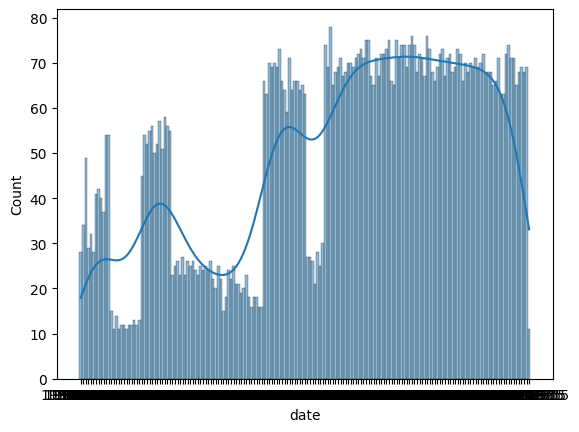

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['date'],bins=10,kde=True)
plt.figure(figsize=(30,8))

<Figure size 3000x800 with 0 Axes>

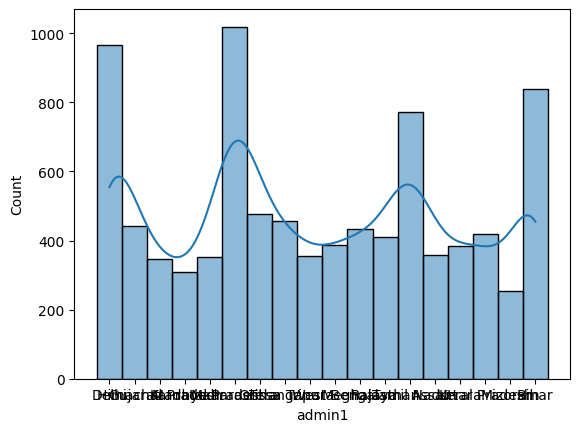

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['admin1'],bins=10,kde=True)
plt.figure(figsize=(30,8))

<Figure size 3000x800 with 0 Axes>

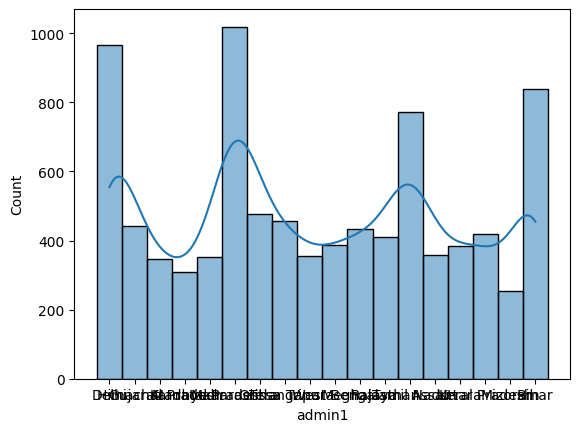

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['admin1'],bins=10,kde=True)
plt.figure(figsize=(30,8))

<Figure size 3000x800 with 0 Axes>

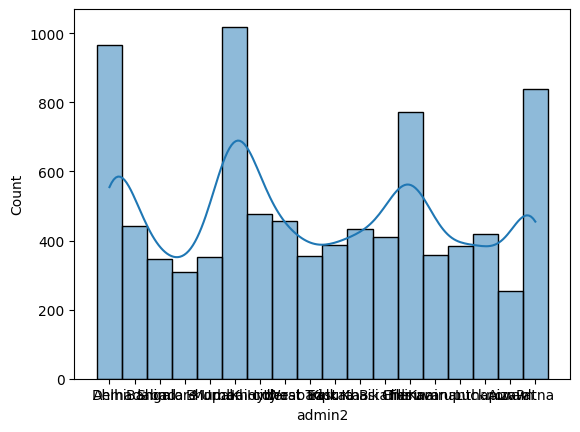

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['admin2'],bins=10,kde=True)
plt.figure(figsize=(30,8))

<Axes: xlabel='market', ylabel='Count'>

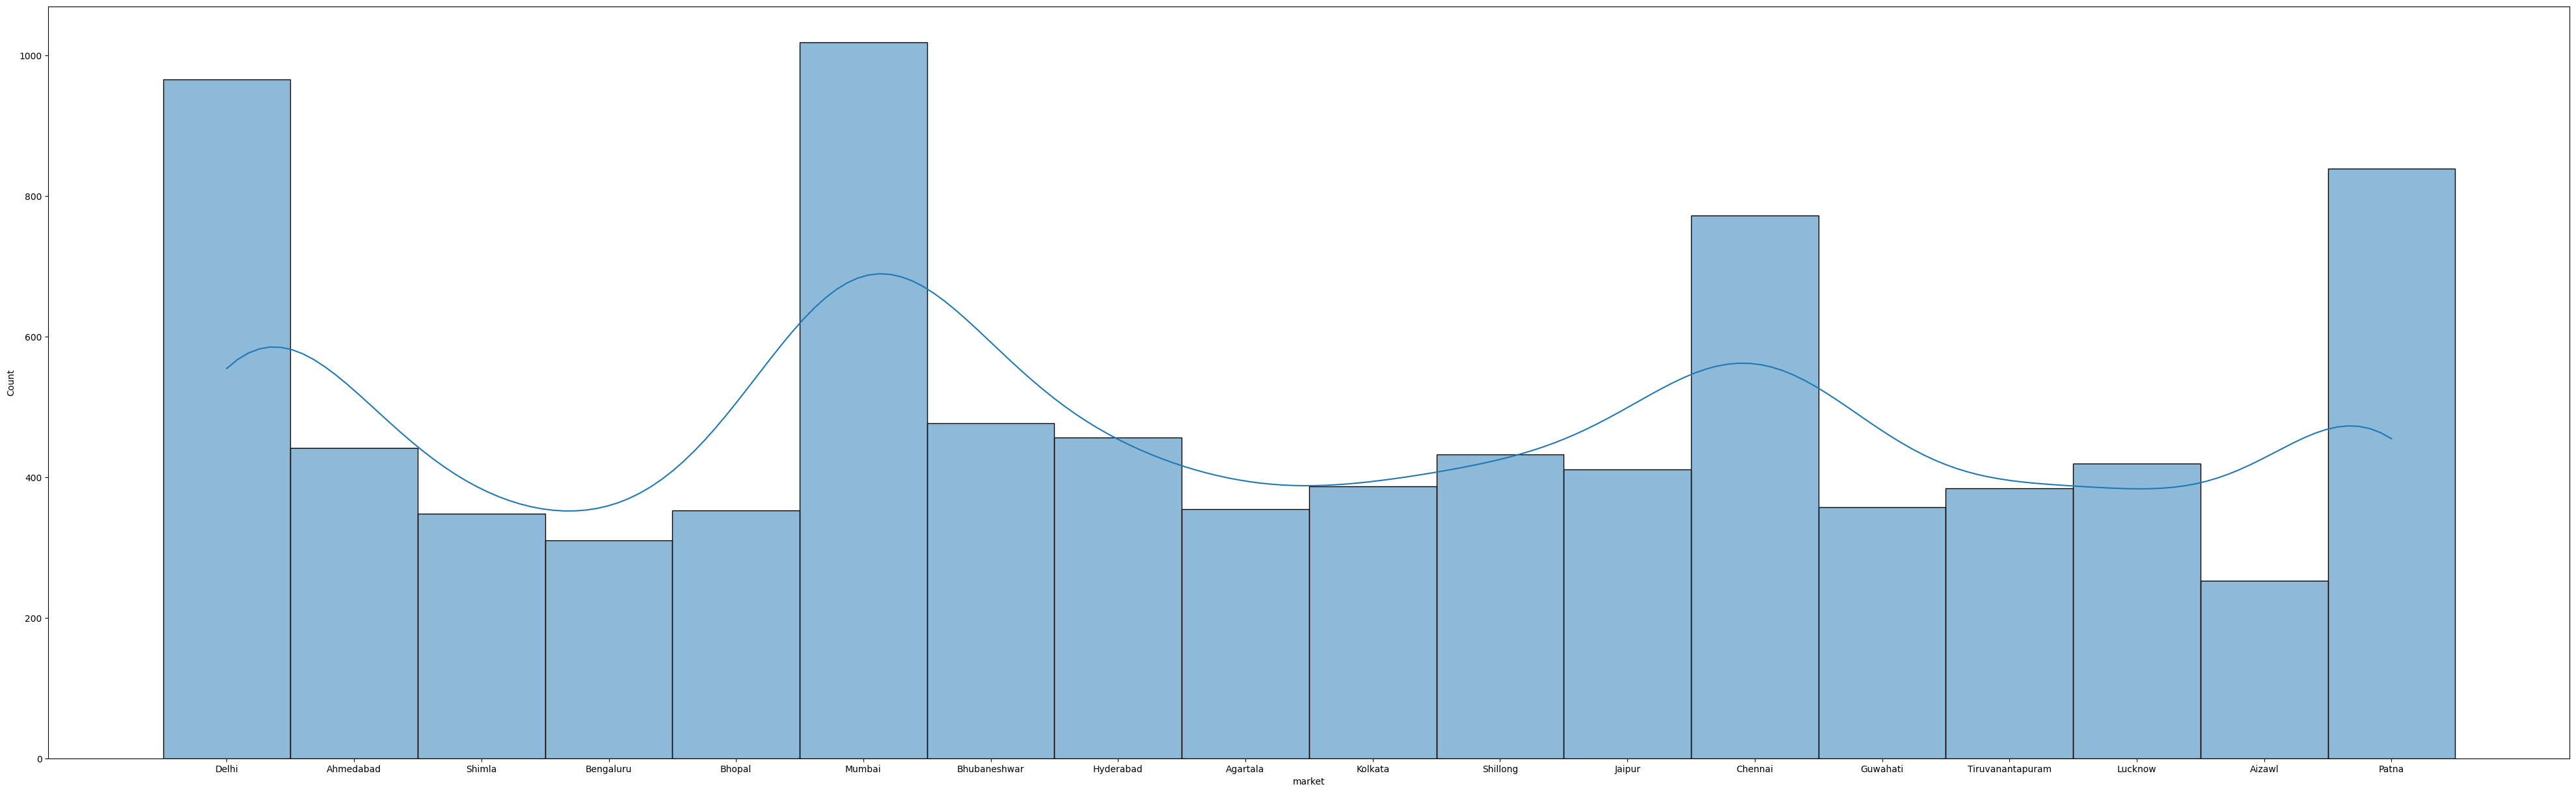

In [ ]:
plt.figure(figsize=(50,15))

sns.histplot(df['market'],bins=10,kde=True)


<Axes: xlabel='count', ylabel='latitude'>

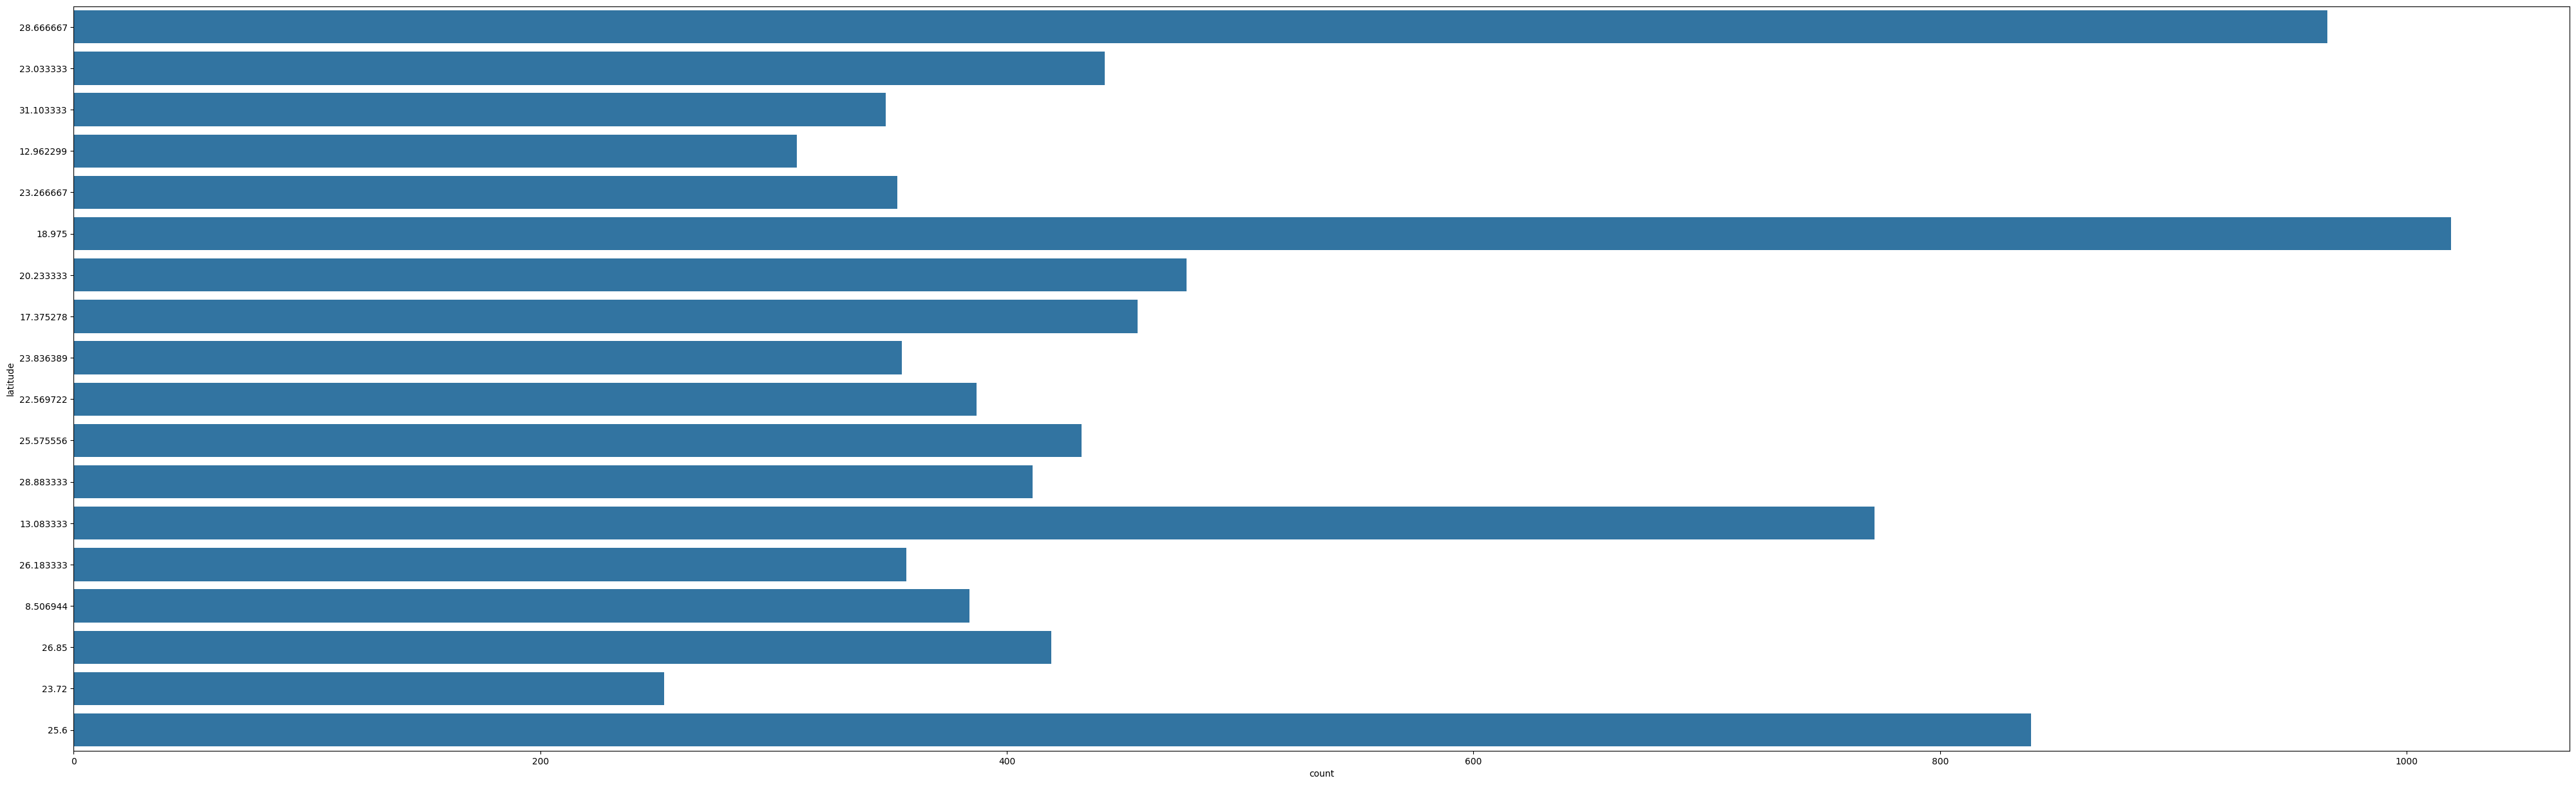

In [ ]:
plt.figure(figsize=(50,15))
sns.countplot(df["latitude"])


<Axes: xlabel='count', ylabel='longitude'>

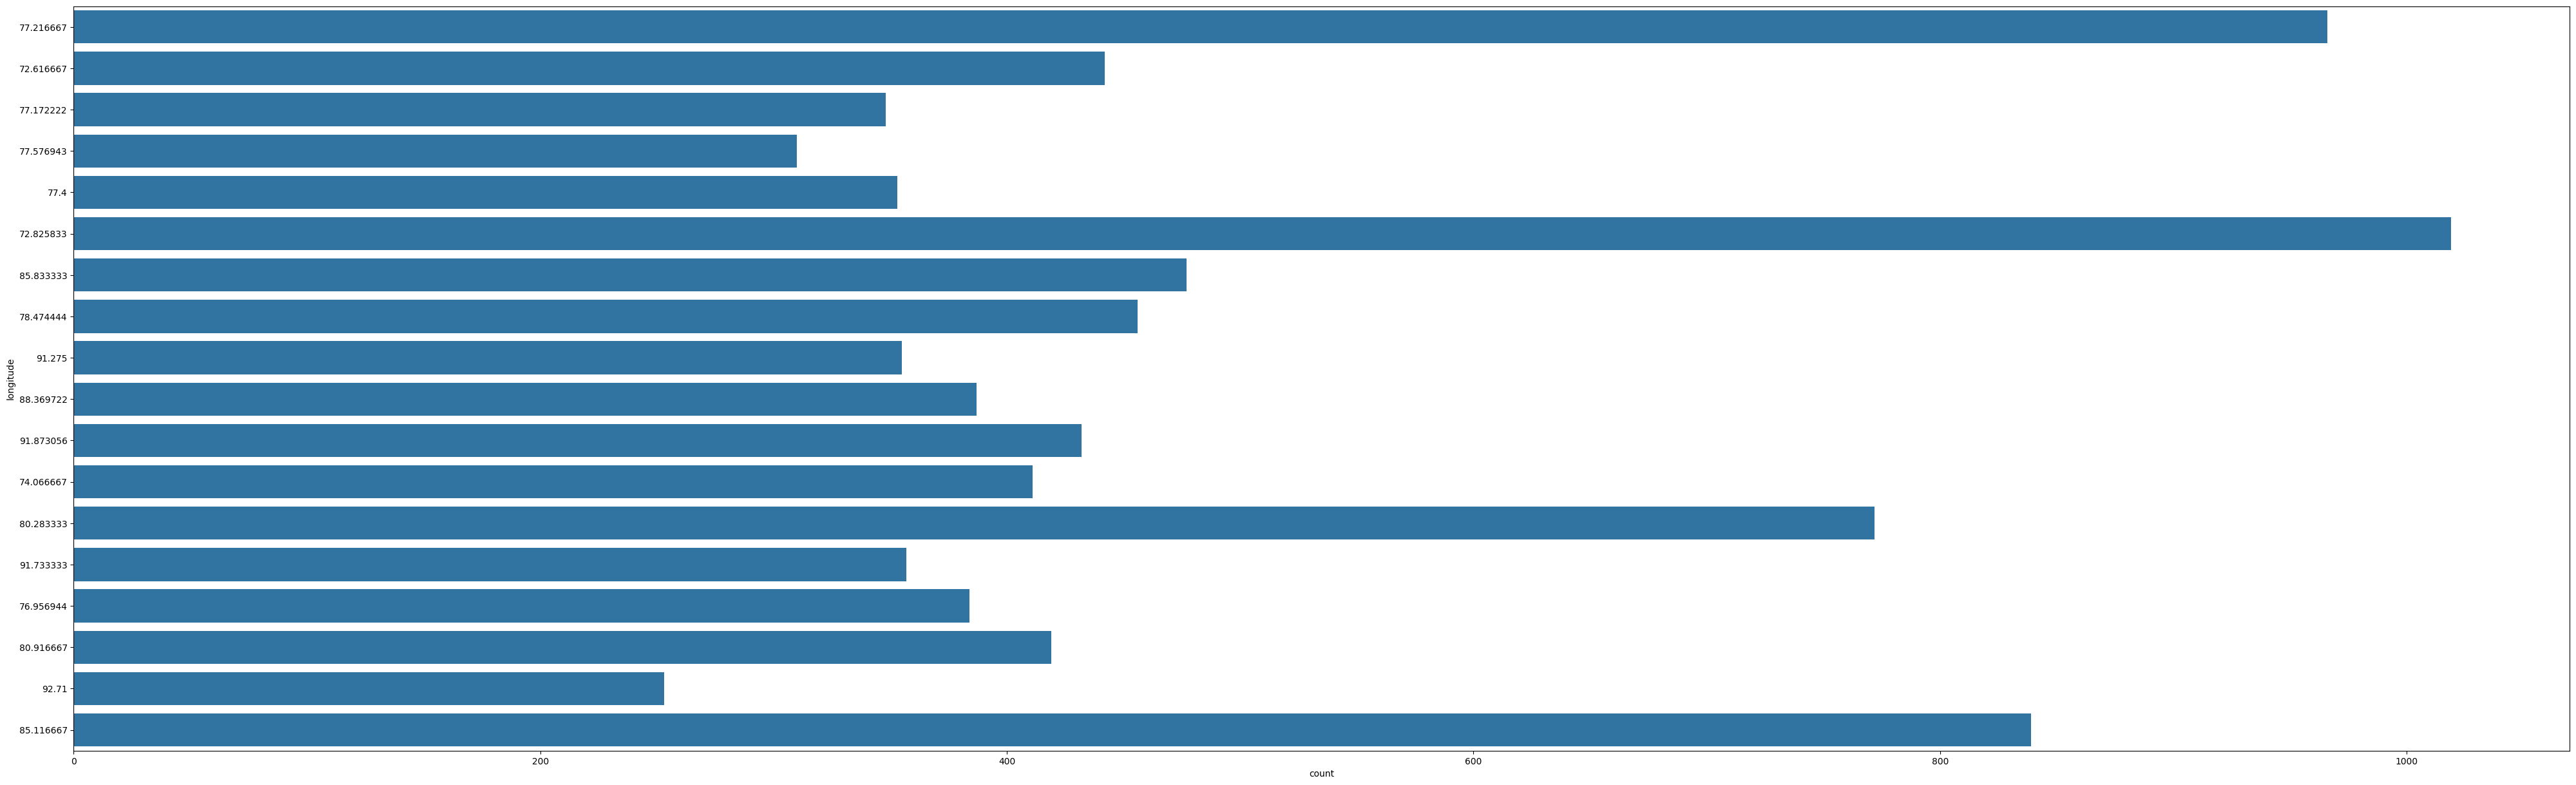

In [ ]:
plt.figure(figsize=(50,15))
sns.countplot(df["longitude"])


## **5.Feature engineering**

In [ ]:


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year
df['Year'] = df['date'].dt.year

# Extract the month
df['Month'] = df['date'].dt.month

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['date'].dt.dayofweek

# droping previous column
df.drop("date", axis=1, inplace=True)

## **Changed date column to 3 columns as year,month,dayofweeek**

## **6.correaltion Analysis**

In [ ]:
df

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Year,Month,DayOfWeek
1,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594,1994,1,5
2,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303,1994,1,5
3,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988,1994,1,5
4,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167,1994,1,5
5,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.2,0.1976,1994,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8976,Bihar,Patna,Patna,25.6,85.116667,cereals and tubers,Rice,KG,actual,Retail,INR,12.0,0.263,2008,9,0
8977,Bihar,Patna,Patna,25.6,85.116667,cereals and tubers,Wheat,KG,actual,Retail,INR,11.0,0.2411,2008,9,0
8978,Bihar,Patna,Patna,25.6,85.116667,miscellaneous food,Sugar,KG,actual,Retail,INR,20.0,0.4384,2008,9,0
8979,Bihar,Patna,Patna,25.6,85.116667,oil and fats,Oil (mustard),KG,actual,Retail,INR,71.0,1.5563,2008,9,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

# Converting all the strings to numerical values using labelencoder class
df["admin1"] = labelencoder.fit_transform(df["admin1"])
df["admin2"] = labelencoder.fit_transform(df["admin2"])
df["market"] = labelencoder.fit_transform(df["market"])
df["commodity"] = labelencoder.fit_transform(df["commodity"])
df["pricetype"] = labelencoder.fit_transform(df["pricetype"])

In [ ]:
df

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Year,Month,DayOfWeek
1,2,6,7,28.666667,77.216667,cereals and tubers,6,KG,actual,0,INR,5.0,0.1594,1994,1,5
2,2,6,7,28.666667,77.216667,miscellaneous food,5,KG,actual,0,INR,13.5,0.4303,1994,1,5
3,2,6,7,28.666667,77.216667,oil and fats,1,KG,actual,0,INR,31.0,0.988,1994,1,5
4,3,0,1,23.033333,72.616667,cereals and tubers,4,KG,actual,0,INR,6.8,0.2167,1994,1,5
5,3,0,1,23.033333,72.616667,cereals and tubers,6,KG,actual,0,INR,6.2,0.1976,1994,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8976,1,14,14,25.6,85.116667,cereals and tubers,4,KG,actual,0,INR,12.0,0.263,2008,9,0
8977,1,14,14,25.6,85.116667,cereals and tubers,6,KG,actual,0,INR,11.0,0.2411,2008,9,0
8978,1,14,14,25.6,85.116667,miscellaneous food,5,KG,actual,0,INR,20.0,0.4384,2008,9,0
8979,1,14,14,25.6,85.116667,oil and fats,1,KG,actual,0,INR,71.0,1.5563,2008,9,0


In [ ]:
df["category"].value_counts()

,count
category,
cereals and tubers,4801
miscellaneous food,1785
oil and fats,1664
pulses and nuts,391
vegetables and fruits,339


In [ ]:
# droping unwanted features
df.drop("priceflag",axis=1,inplace=True)
df.drop("currency",axis=1,inplace=True)

# droping usdprice column because we only need one price column
df.drop("usdprice",axis=1,inplace=True)




# replacing because  replacing is better accurate
df["unit"].replace(["KG","L","100 KG"],[1,2,3],inplace=True)
df["category"].replace(["oil and fats","cereals and tubers","miscellaneous food","pulses and nuts","vegetables and fruits","milk and dairy"],[1,2,3,4,5,6],inplace=True)

<ipython-input-28-6076214b7bc8>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["unit"].replace(["KG","L","100 KG"],[1,2,3],inplace=True)
<ipython-input-28-6076214b7bc8>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["unit"].replace(["KG","L","100 KG"],[1,2,3],inplace=True)
<ipython-input

In [ ]:
# changing object data type into float

df["latitude"]=df["latitude"].astype(float)
df["longitude"]=df["longitude"].astype(float)
df["price"]=df["price"].astype(float)

In [ ]:
df

,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,price,Year,Month,DayOfWeek
1,2,6,7,28.666667,77.216667,2,6,1,0,5.00,1994,1,5
2,2,6,7,28.666667,77.216667,3,5,1,0,13.50,1994,1,5
3,2,6,7,28.666667,77.216667,1,1,1,0,31.00,1994,1,5
4,3,0,1,23.033333,72.616667,2,4,1,0,6.80,1994,1,5
5,3,0,1,23.033333,72.616667,2,6,1,0,6.20,1994,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8976,1,14,14,25.600000,85.116667,2,4,1,0,12.00,2008,9,0
8977,1,14,14,25.600000,85.116667,2,6,1,0,11.00,2008,9,0
8978,1,14,14,25.600000,85.116667,3,5,1,0,20.00,2008,9,0
8979,1,14,14,25.600000,85.116667,1,1,1,0,71.00,2008,9,0


Text(0.5, 1.0, 'Correlation Matrix')

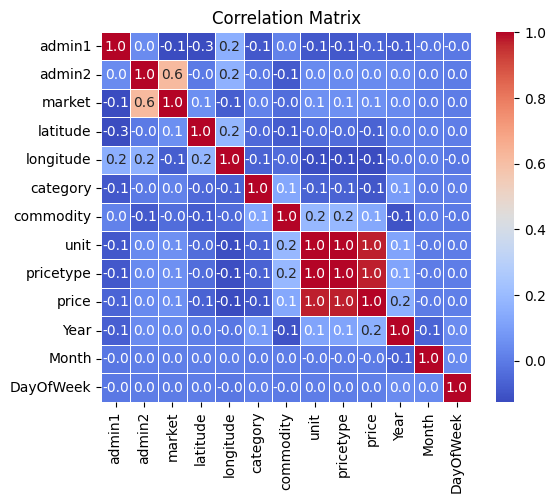

In [ ]:
# Correlation matrix
Corr_matrix = df.corr()

# Heatmap of correlation matrix

sns.heatmap(Corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0.5, robust=True,square=True) # 0.01f should be given for float values.
plt.title('Correlation Matrix')

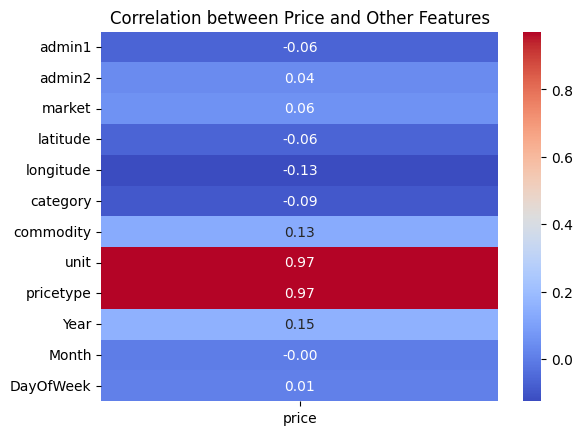

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between 'price' and all other columns
price_corr = df.corr()['price']

# Remove the correlation of 'price' with itself (which is always 1)
price_corr = price_corr.drop('price')

# Create a heatmap to visualize the correlations
sns.heatmap(price_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})  # to_frame() converts Series to DataFrame for heatmap
plt.title('Correlation between Price and Other Features')
plt.show()

In [ ]:
# droping less correlation features

df.drop('Month',axis=1,inplace=True)
df.drop('admin2',axis=1,inplace=True)

## **in this step  admin1,admin2,market,commodity,pricetype this features changed to numeric column with label encoder**

## unwanted columns(priceflag,currency,usdprice) are droped

## replacing because  replacing is better accurate(unit,category)

## droped less correlated features (Month,admin2)

##**Skewness and log**

### **admin1**

<Figure size 3000x800 with 0 Axes>

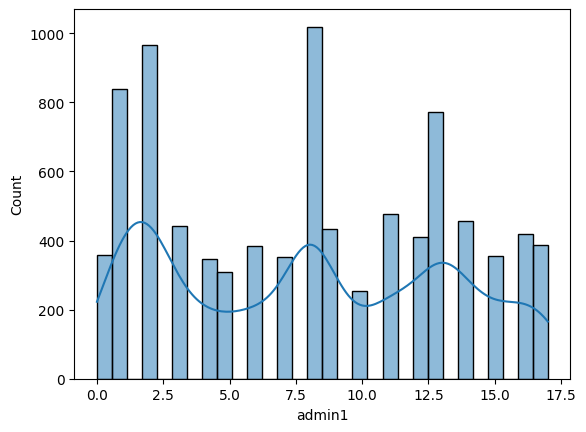

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df['admin1'],bins=30, kde=True)
plt.figure(figsize=(30,8))

### **market**

<Figure size 3000x800 with 0 Axes>

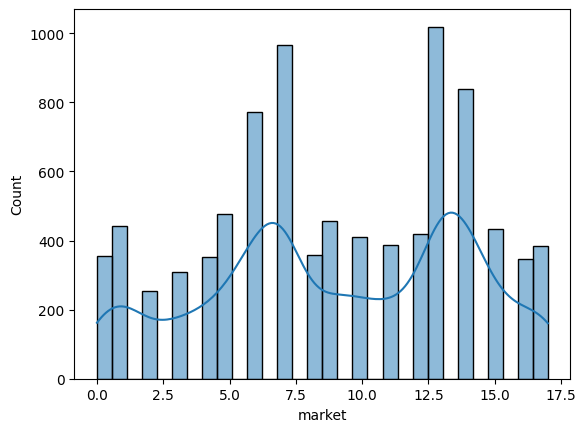

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df['market'],bins=30, kde=True)
plt.figure(figsize=(30,8))

### **latitude**

<Figure size 3000x800 with 0 Axes>

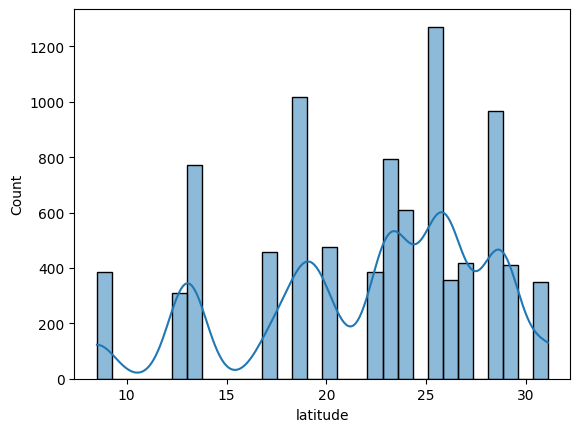

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df['latitude'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['latitude'] = np.log1p(df['latitude'])

### **longitude**

<Figure size 3000x800 with 0 Axes>

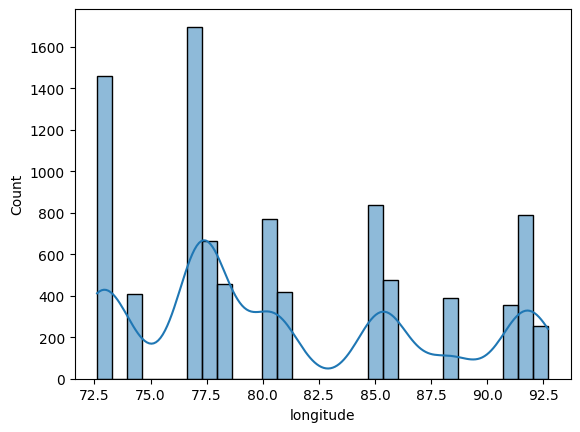

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df['longitude'],bins=30, kde=True)
plt.figure(figsize=(30,8))

### **category**

<Figure size 3000x800 with 0 Axes>

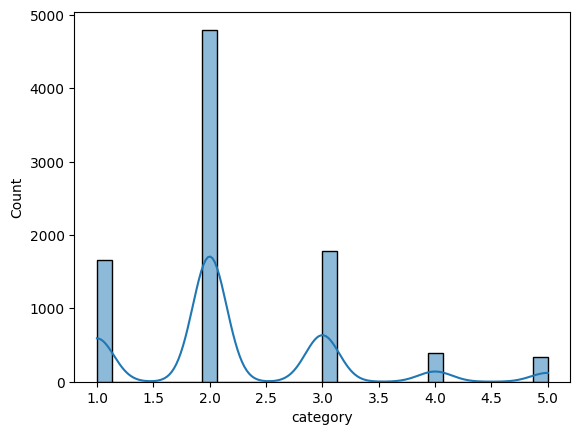

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df['category'],bins=30, kde=True)
plt.figure(figsize=(30,8))

### **commodity**

<Figure size 3000x800 with 0 Axes>

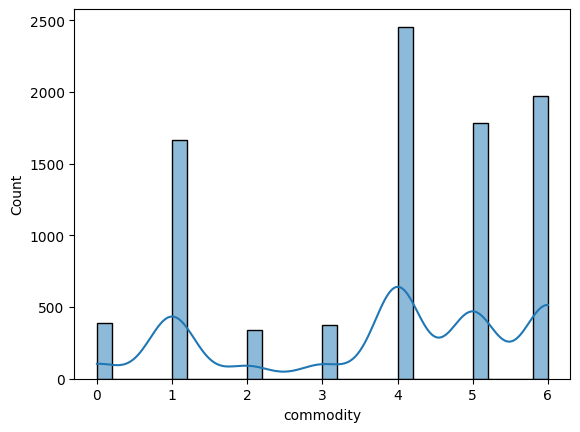

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df['commodity'],bins=30, kde=True)
plt.figure(figsize=(30,8))

### **Unit**

<Figure size 3000x800 with 0 Axes>

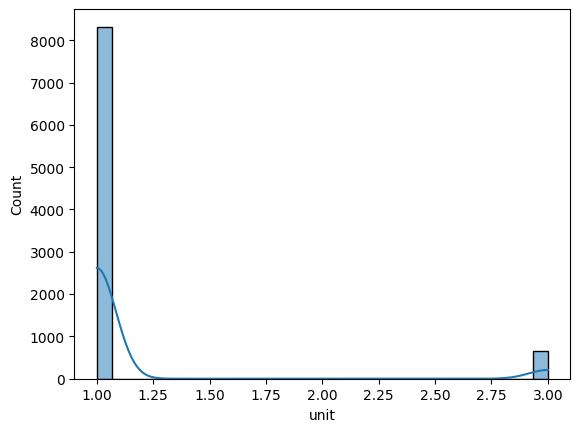

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df['unit'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['unit'] = np.log1p(df['unit'])

### **pricetype**

<Figure size 3000x800 with 0 Axes>

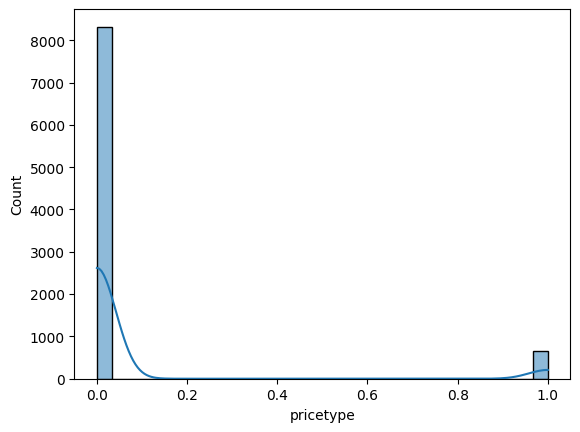

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df['pricetype'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['pricetype'] = np.log1p(df['pricetype'])

### **Year**

<Figure size 3000x800 with 0 Axes>

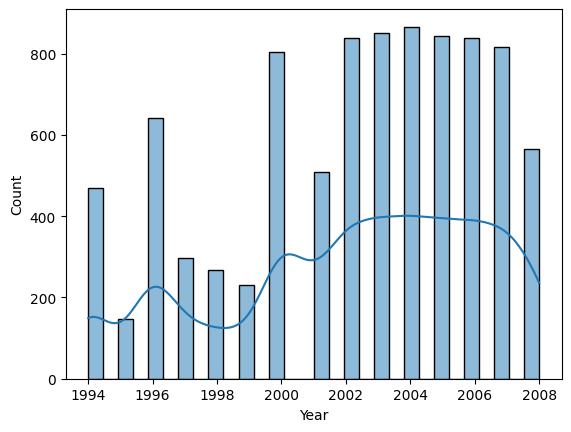

<Figure size 3000x800 with 0 Axes>

In [ ]:


sns.histplot(df['Year'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['Year'] = np.log1p(df['Year'])

### **DayOfWeek**

<Figure size 3000x800 with 0 Axes>

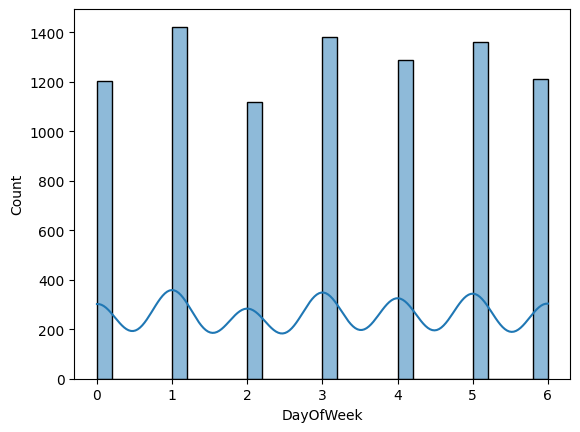

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['DayOfWeek'],bins=30, kde=True)
plt.figure(figsize=(30,8))

## **7.Outlier detection**

### balcony

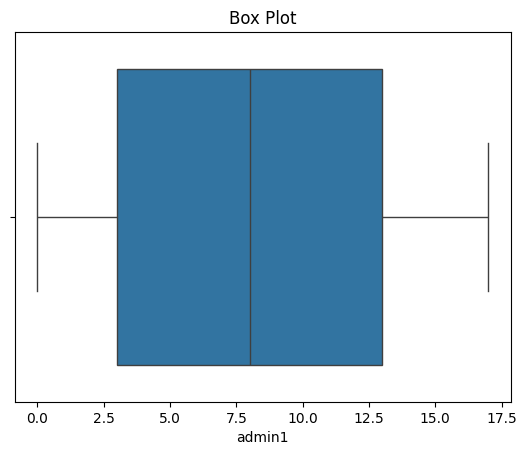

Number of outliers in admin1: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['admin1'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['admin1']))
outliers2 = df[z_scores > 3]
print(f'Number of outliers in admin1: {outliers2.shape[0]}')

### market

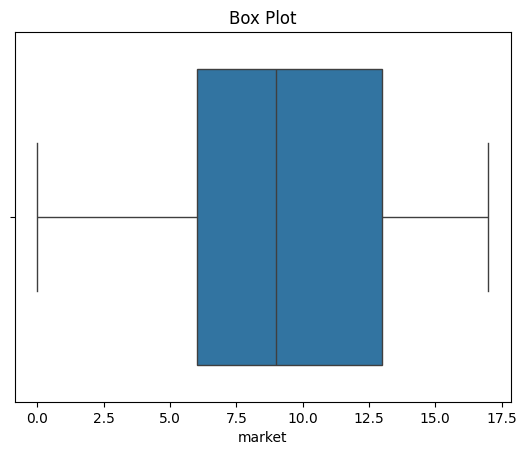

Number of outliers in market: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['market'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['market']))
outliers2 = df[z_scores > 3]
print(f'Number of outliers in market: {outliers2.shape[0]}')

### latitude

In [ ]:
# # Visual detection of outliers using a box plot
# sns.boxplot(x=df['latitude'])
# plt.title('Box Plot')
# plt.show()

# # Z-score to detect outliers
# from scipy import stats
# import numpy as np

# z_scores = np.abs(stats.zscore(df['latitude']))
# outliers4 = df[z_scores > 3]
# print(f'Number of outliers in latitude: {outliers4.shape[0]}')

### **longitude**

In [ ]:
# # Visual detection of outliers using a box plot
# sns.boxplot(x=df['longitude'])
# plt.title('Box Plot')
# plt.show()

# # Z-score to detect outliers
# from scipy import stats
# import numpy as np

# z_scores = np.abs(stats.zscore(df['longitude']))
# outliers4 = df[z_scores > 3]
# print(f'Number of outliers in longitude: {outliers4.shape[0]}')

###category

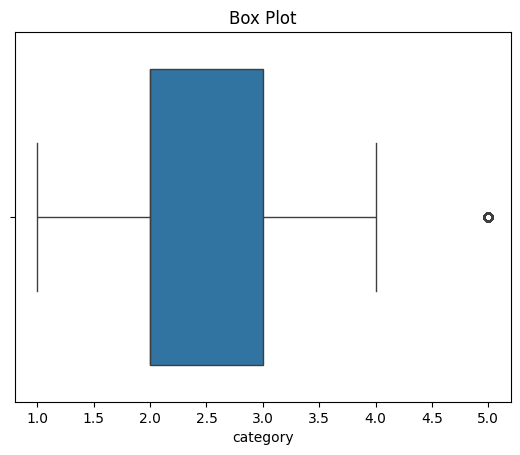

Number of outliers in category: 339


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['category'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['category']))
outliers4 = df[z_scores > 3]
print(f'Number of outliers in category: {outliers4.shape[0]}')

### commodity

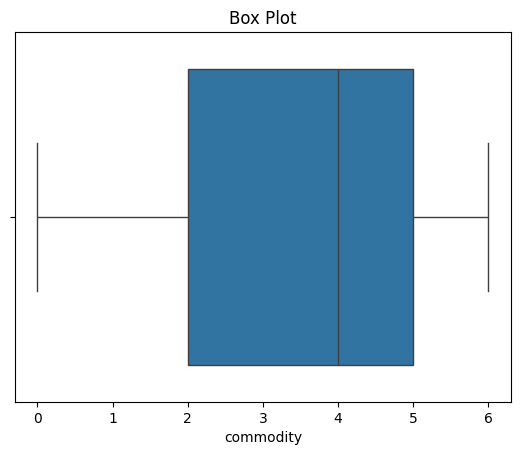

Number of outliers in commodity: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['commodity'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['commodity']))
outliers7 = df[z_scores > 3]
print(f'Number of outliers in commodity: {outliers2.shape[0]}')

### unit

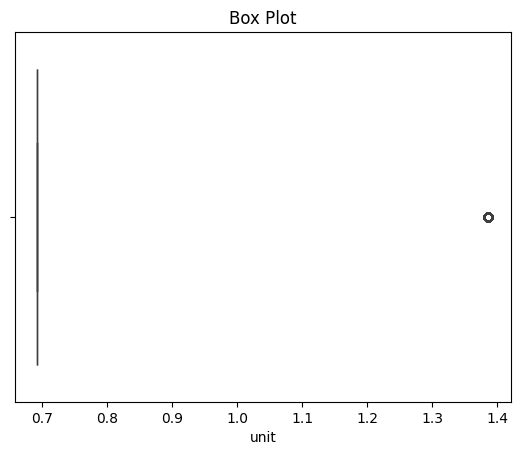

Number of outliers in unit: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['unit'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['unit']))
outliers8 = df[z_scores > 3]
print(f'Number of outliers in unit: {outliers2.shape[0]}')

### pricetype

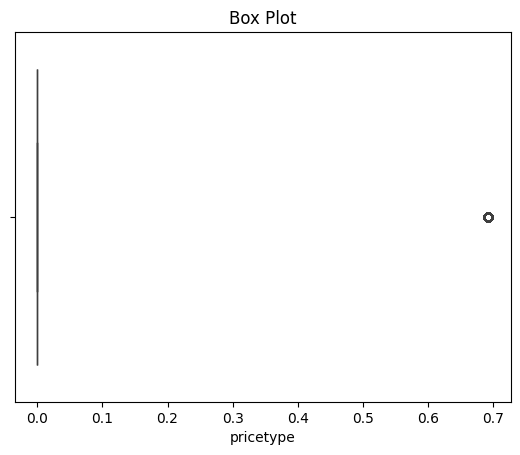

Number of outliers in pricetype: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['pricetype'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['pricetype']))
outliers9 = df[z_scores > 3]
print(f'Number of outliers in pricetype: {outliers2.shape[0]}')

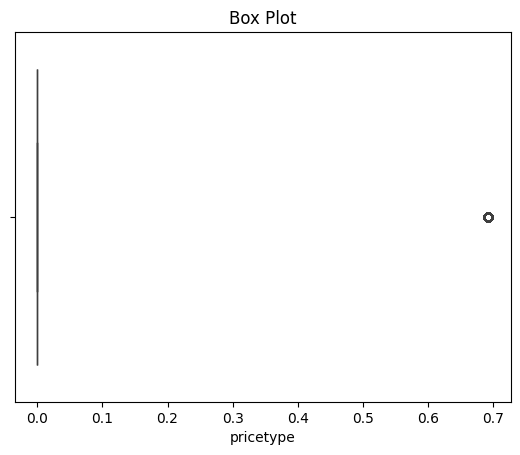

Number of outliers in pricetype: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['pricetype'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['pricetype']))
outliers10 = df[z_scores > 3]
print(f'Number of outliers in pricetype: {outliers2.shape[0]}')

### Year

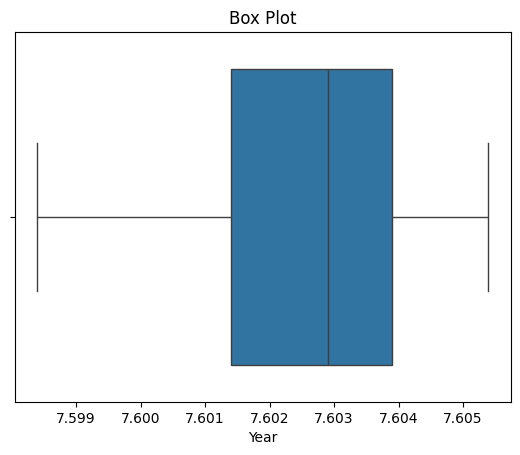

Number of outliers in Year: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['Year'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['Year']))
outliers10 = df[z_scores > 3]
print(f'Number of outliers in Year: {outliers2.shape[0]}')

### DayOfWeek

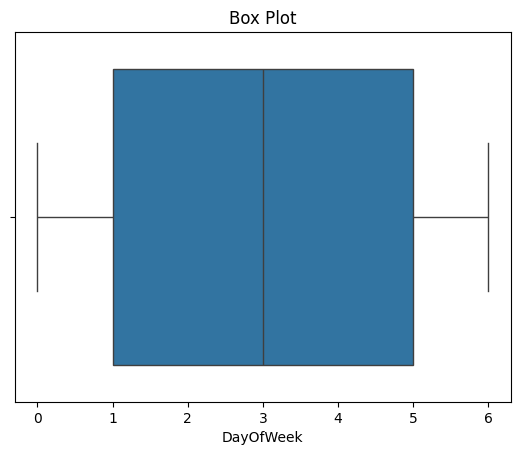

Number of outliers in DayOfWeek: 0


In [ ]:

# Visual detection of outliers using a box plot
sns.boxplot(x=df['DayOfWeek'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['DayOfWeek']))
outliers10 = df[z_scores > 3]
print(f'Number of outliers in DayOfWeek: {outliers2.shape[0]}')

## **cheking and removing outliers**

In [ ]:
df.shape

(8980, 11)

<Axes: >

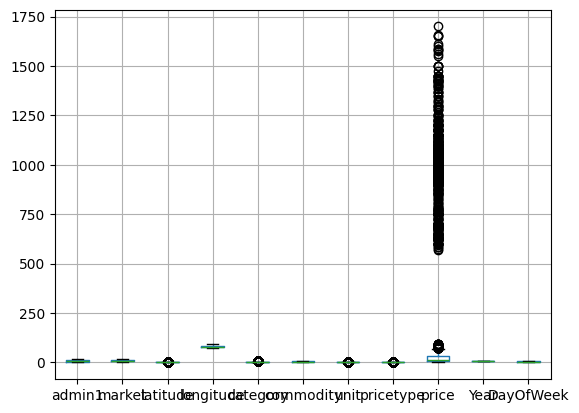

In [ ]:
df.boxplot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8980 entries, 1 to 8980
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   admin1     8980 non-null   int64  
 1   market     8980 non-null   int64  
 2   latitude   8980 non-null   float64
 3   longitude  8980 non-null   float64
 4   category   8980 non-null   int64  
 5   commodity  8980 non-null   int64  
 6   unit       8980 non-null   float64
 7   pricetype  8980 non-null   float64
 8   price      8980 non-null   float64
 9   Year       8980 non-null   float64
 10  DayOfWeek  8980 non-null   int32  
dtypes: float64(6), int32(1), int64(4)
memory usage: 1.0 MB


In [ ]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='price')
df_cleaned

,admin1,market,latitude,longitude,category,commodity,unit,pricetype,price,Year,DayOfWeek
1,2,7,3.390024,77.216667,2,6,0.693147,0.0,5.00,7.598399,5
2,2,7,3.390024,77.216667,3,5,0.693147,0.0,13.50,7.598399,5
3,2,7,3.390024,77.216667,1,1,0.693147,0.0,31.00,7.598399,5
4,3,1,3.179442,72.616667,2,4,0.693147,0.0,6.80,7.598399,5
5,3,1,3.179442,72.616667,2,6,0.693147,0.0,6.20,7.598399,5
...,...,...,...,...,...,...,...,...,...,...,...
8976,1,14,3.280911,85.116667,2,4,0.693147,0.0,12.00,7.605392,0
8977,1,14,3.280911,85.116667,2,6,0.693147,0.0,11.00,7.605392,0
8978,1,14,3.280911,85.116667,3,5,0.693147,0.0,20.00,7.605392,0
8979,1,14,3.280911,85.116667,1,1,0.693147,0.0,71.00,7.605392,0


In [ ]:
df=df_cleaned

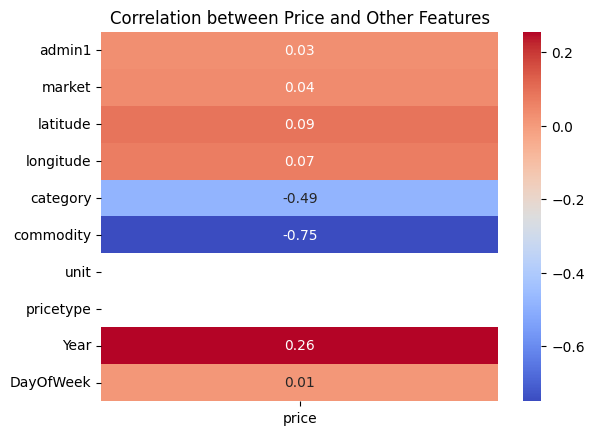

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between 'price' and all other columns
price_corr = df.corr()['price']

# Remove the correlation of 'price' with itself (which is always 1)
price_corr = price_corr.drop('price')

# Create a heatmap to visualize the correlations
sns.heatmap(price_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})  # to_frame() converts Series to DataFrame for heatmap
plt.title('Correlation between Price and Other Features')
plt.show()

In [ ]:
df2=df
dfa=df

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['market', 'admin1', 'latitude',"longitude","category","commodity","unit","pricetype","Year","DayOfWeek"]]  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 95.23790559558256, RMSE: 9.758991013193043, R-squared: 0.6642715404303556


## **After cheking and removing outliers the shape of dataset goes from (176192, 11) to (151782, 11)**

## **And non scaled data predict here and mse higher**

## **8.Dimensionality reduction**

---

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['market', 'admin1', 'latitude',"longitude","category","commodity","unit","pricetype","Year","DayOfWeek"]
scaler = StandardScaler().fit_transform(df[features])


# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # choosing 2 n_components
pca_result = pca.fit_transform(scaler)


# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]




In [ ]:
from sklearn.model_selection import train_test_split
X = df[["pca1","pca2"]]  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 144.6098739751778, RMSE: 12.025384566623131, R-squared: 0.4902276575210749


## **After pca scaled, its prediction  have higher mse (error)**

## **9.Data Scaling**

---

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming  DataFrame is called 'df'
# Select the features that  want to scale
features = ['market', 'admin1', 'latitude',"longitude","category","commodity","unit","pricetype","Year","DayOfWeek"]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to  data and transform it
scaled_data = scaler.fit_transform(df[features])

# Create a new DataFrame with the scaled data (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)
scaled_df["price"]=df['price']
df=scaled_df
df

,market,admin1,latitude,longitude,category,commodity,unit,pricetype,Year,DayOfWeek,price
1,0.4375,0.117647,0.905194,0.228932,0.333333,1.000000,0.0,0.0,0.0,0.833333,5.00
2,0.4375,0.117647,0.905194,0.228932,0.666667,0.833333,0.0,0.0,0.0,0.833333,13.50
3,0.4375,0.117647,0.905194,0.228932,0.000000,0.166667,0.0,0.0,0.0,0.833333,31.00
4,0.0625,0.176471,0.652272,0.000000,0.333333,0.666667,0.0,0.0,0.0,0.833333,6.80
5,0.0625,0.176471,0.652272,0.000000,0.333333,1.000000,0.0,0.0,0.0,0.833333,6.20
...,...,...,...,...,...,...,...,...,...,...,...
8976,0.8750,0.058824,0.774143,0.622097,0.333333,0.666667,0.0,0.0,1.0,0.000000,12.00
8977,0.8750,0.058824,0.774143,0.622097,0.333333,1.000000,0.0,0.0,1.0,0.000000,11.00
8978,0.8750,0.058824,0.774143,0.622097,0.666667,0.833333,0.0,0.0,1.0,0.000000,20.00
8979,0.8750,0.058824,0.774143,0.622097,0.000000,0.166667,0.0,0.0,1.0,0.000000,71.00


In [ ]:
from sklearn.model_selection import train_test_split
X = df[['market', 'admin1', 'latitude',"longitude","category","commodity","unit","pricetype","Year","DayOfWeek"]]  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 95.23790559558431, RMSE: 9.758991013193132, R-squared: 0.6642715404303494


## **after data scaling predicted model have also higher mse (error)**

## Feature engineering

<Figure size 3000x800 with 0 Axes>

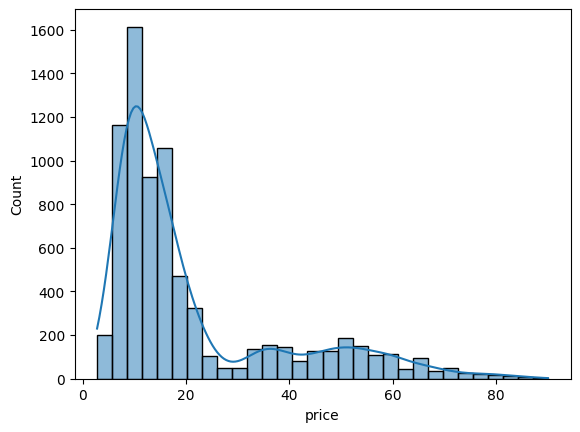

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df2['price'],bins=30, kde=True)
plt.figure(figsize=(30,8))

**Target column has a skewed distribution. so logaritham aplying can help to improve model performance**

In [ ]:

# Feature Engineering
df2['price_per_unit'] = df2['price'] / df2['unit']
df2['category_commodity'] = df2['category'] * df2['commodity']  # compaining category column and commodity column because its connected so compaining can help to improve prediction
df2['price'] = np.log1p(df2['price'])  # Log transform target variable


## **After reffering some dataset and some chatbot i decided to do another feature engineering**

## **price and unit column compained to one like price per unit and category and commodity column are connected so that also compained to one, and feature and target variable has skewness so logaritham can may be help us to improve model performance**


## **10.Initial modeling and Hypothesis testing**

---


In [ ]:


# Splitting data
from sklearn.model_selection import train_test_split
X = df2[['market', 'admin1', 'latitude', "longitude", "category", "commodity", "unit", "pricetype", "Year", "DayOfWeek", "price_per_unit", "category_commodity"]]  # Include new features
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)





from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 0.02321456650285962, RMSE: 0.15236327150222137, R-squared: 0.9455557140440356


## **11.Documentation and reporting**

In [ ]:

# comparing to all predictions non scaled and feature engineered data has less mse and higher r^2 so decided to report with linear regression model
print("used (non scaled and feature engineered data with linear regression) as final model the rmse and mse and r^2  values are below:- ")




# Splitting data
from sklearn.model_selection import train_test_split
X = df2[['market', 'admin1', 'latitude', "longitude", "category", "commodity", "unit", "pricetype", "Year", "DayOfWeek", "price_per_unit", "category_commodity"]]  # Include new features
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)





from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

print()
print()


# Summarize key findings
summary = {
    'Dataset Shape': df2.shape,
    'Missing Values': df2.isnull().sum().sum(),
    'Correlation with price': df2.corr()['price'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")


used (non scaled and feature engineered data with linear regression) as final model the rmse and mse and r^2  values are below:- 
MSE: 0.02321456650285962, RMSE: 0.15236327150222137, R-squared: 0.9455557140440356


EDA Summary:
Dataset Shape: (7597, 15)
Missing Values: 0
Correlation with price: price                 1.000000
price_per_unit        0.954365
pca1                  0.381399
Year                  0.293721
latitude              0.076343
longitude             0.076298
admin1                0.025872
market                0.014890
DayOfWeek             0.014383
category             -0.331028
pca2                 -0.490071
category_commodity   -0.599408
commodity            -0.747232
unit                       NaN
pricetype                  NaN
Name: price, dtype: float64


**Based on the analysis of  Food price in india dataset for predicting the price , the linear regression model demonstrated the best perfomance.**
-
Based on the evaluation of the regression models for predicting price , the linear regression model with learning rate of 0.25 and random state set to 42 emerged as the best-performing  model. it achived the highest accuracy and consistently strong results.

- some changes on datsets given below:

 - in this data set prediction step after reffering some chatbots and datsets i decided to logaritham applying on target variable.  because chatbot says  target varible has skewness so logaritham applying helps to improve model performance.
 - if we need model deploying part log transformed target varible should reverse with exponantioal method  **Thats  important because target varible log transformed**.